In [2]:
import numpy as np
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt
import sympy as sm
sm.init_printing(use_unicode=True) # for pretty printing

In [3]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

In [4]:
h_vec = np.linspace(0.1,1.5,100)

In [5]:
# create basic functions

# utility
def utility(c, rho):
    return c**(1 - rho)/(1 - rho)

# disutility
def disutility(gamma, l):
    return gamma*l

# consumption
def cons(w, h, b, l):
    return w*h*l + b*(1 - l)

# utility in period 2
def v2(l2, w, b, h2, rho, gamma):
    return utility(cons(w, h2, b, l2), rho) - disutility(gamma, l2)

# utility in period 1
def v1(l1, w, b, rho, gamma, h1, Delta, beta, v2_interp):
    """   
    returns the (net)utility in period 1
    
    parameters: see model description
    
    """
    # a. v2 if 0 extra human capital
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # b. v2 if Delta extra human capital
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # c. expected v2 value
    v2 = 0.5*v2_low + 0.5*v2_high
    
    # d. total net utility
    return utility(cons(w, h1, b, l1), rho) - disutility(gamma, l1) + beta*v2

Text(0.5, 1.0, 'labor supply in period 2')

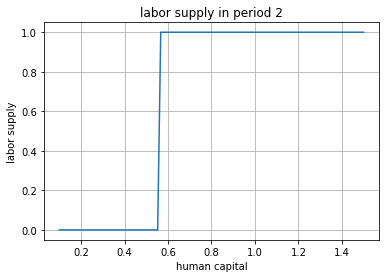

In [6]:
# a. create function to solve the problem in period 2
def solve_period_2(rho, w, b, h_vec, gamma, Delta):
    """   
    returns the labor supply and utility in period 2 for different levels of human capital
    
    parameters: see model description
    """
    # i. define grids
    v2_vec = np.empty(100)
    l2_vec = np.empty(100, dtype=int)

    # ii. solve for each h in grid
    for i,h2 in enumerate(h_vec):
       
        # 1. compare v2 for l2 = 0 and l2 = 1 and return the l2 that maximizes v2
        if (v2(0, w, b, h2, rho, gamma) > v2(1, w, b, h2, rho, gamma)) == True:
            l2_vec[i] = 0
        else:
            l2_vec[i] = 1
        
        # 2. append the v2 value from the optimized l2 for each h
        v2_vec[i] = v2(l2_vec[i], w, b, h2, rho, gamma)
               
    return v2_vec, l2_vec

# b. use the function to solve the model in period 2
v2_vec, l2_vec = solve_period_2(rho, w, b, h_vec, gamma, Delta)

# c. plot period 2 solution
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(h_vec, l2_vec)

# d. set grids
ax.grid()
    
# e. set labels
ax.set_ylabel('labor supply')
ax.set_xlabel('human capital')

# f. set title
ax.set_title('labor supply in period 2')

Text(0.5, 1.0, 'labor supply in period 1')

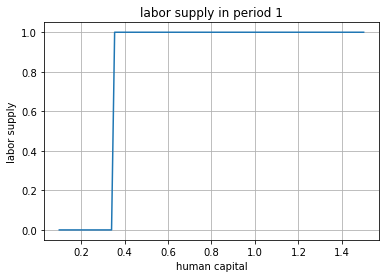

In [7]:
# a. interpolate utility from period 2
v2_interp = interpolate.RegularGridInterpolator((h_vec,), v2_vec,
                                                    bounds_error=False,fill_value=None)

# b. create functionto solve problem in period 1
def solve_period_1(w, b, rho, gamma, Delta, beta, v2_interp):
    
    # i. define grids
    v1_vec = np.empty(100)
    l1_vec = np.empty(100, dtype=int)
    
    # ii. solve for each h in grid
    for i,h in enumerate(h_vec):
       
        # 1. compare v1 for l1 = 0 and l1 = 1 and return the l1 that maximizes v1
        if (v1(0, w, b, rho, gamma, h, Delta, beta, v2_interp) > v1(1, w, b, rho, gamma, h, Delta, beta, v2_interp)) == True:
            l1_vec[i] = 0
        else:
            l1_vec[i] = 1
        
        # 2. append the v1 value from the optimized l1
        v1_vec[i] = v1(l1_vec[i], w, b, rho, gamma, h, Delta, beta, v2_interp)
               
    return v1_vec, l1_vec

v1_vec, l1_vec = solve_period_1(w, b, rho, gamma, Delta, beta, v2_interp)

# illustrate period 1 solution
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(h_vec, l1_vec)

# set grids
ax.grid()
    
# v. set labels
ax.set_ylabel('labor supply')
ax.set_xlabel('human capital')

# set title
ax.set_title('labor supply in period 1')

In [8]:
print(v2_interp)